# 0. Import Package and Configuration

In [1]:
import random
import scipy.stats as stats
from scipy.stats import ks_2samp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time, datetime
import json
from urllib.parse import quote
import seaborn as sns
import pickle, csv
import numpy as np
import pandas as pd
import glob
import itertools
from compress_pickle import dump as cdump
from compress_pickle import load as cload
import networkx as nx
from multiprocessing import Pool
import os, sys
import numpy as np
import matplotlib.ticker as ticker
import geopandas as gpd
import matplotlib.patches as mpatches
import shapely.geometry as sgeom
import contextily as cx
import random as rand
import scipy as sp
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import matplotlib.colors as clr
import warnings
warnings.filterwarnings("ignore")

In [2]:
mode = 1; year= 0
fsize = 12; tdir = 'in'; major = 6; minor = 3; lwidth = 1; lhandle = 1
space_symbol = '                          '
mymarkersize  = 4
color_platte = ['#00429d', '#4771b2', 
'#73a2c6', '#a5d5d8', '#ffffe0', '#fcc17e', '#e0884e', '#bc4f3c', '#93003a']
plt.style.use('default')
sns.set_theme(style="white")
plt.rcParams['font.size'] = fsize
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['legend.fontsize'] = fsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.labelsize'] = fsize
plt.rcParams['ytick.labelsize'] = fsize
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = True
plt.rcParams.update({'font.family':'Arial'})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_platte)

In [3]:
colors= ['#001144', '#00245a', '#013871', '#0d4c89', '#305f9e', '#4973b4', '#6087ca', '#779ce1', '#8eb2f9', '#a7caff', '#c1e4ff'][::-1]
nodes = np.arange(0,1.1,0.1)
homecmap = clr.LinearSegmentedColormap.from_list("homecmap", list(zip(nodes, colors)))

colors= ['#001819', '#012b2e', '#0a3e41', '#235255', '#386669', '#4d7b7e', '#639194', '#78a7aa', '#8fbec1', '#a5d5d8', '#bdedf0'][::-1]
nodes = np.arange(0,1.1,0.1)
workcmap = clr.LinearSegmentedColormap.from_list("workcmap", list(zip(nodes, colors)))

colors= ['#310300', '#401a00', '#532d00', '#694001', '#805313', '#976728', '#ae7b3c', '#c69050', '#dea664', '#f7bc79', '#ffd995'][::-1]
nodes = np.arange(0,1.1,0.1)
othercmap = clr.LinearSegmentedColormap.from_list("othercmap", list(zip(nodes, colors)))

colors= ['#440000', '#580000', '#700401', '#892216', '#a23929', '#bc4f3c', '#d66550', '#f17c65', '#ff937b', '#ffab91', '#ffc3a8'][::-1]
nodes = np.arange(0,1.1,0.1)
totalcmap = clr.LinearSegmentedColormap.from_list("totalcmap", list(zip(nodes, colors)))

colors= ['#00429d', '#73a2c6', '#ffffe0', '#e0884e', '#93003a']
nodes = np.arange(0,1.1,0.25)
catcmap = clr.LinearSegmentedColormap.from_list("catcmap", list(zip(nodes, colors)))

# 1. Calculate the User Info

## 1.1 Get Info

In [ ]:
# housetype = pd.read_csv('data/census/ACS1101/ACSST5Y2019.S1101_data_with_overlays_2022-04-05T180436.csv',skiprows=[1])
# housetype = housetype[['GEO_ID','S1101_C01_014E','S1101_C01_015E','S1101_C01_016E']]
# income = pd.read_csv('data/census/ACS1901/ACSST5Y2019.S1901_data_with_overlays_2022-04-05T181030.csv',skiprows=[1])
# income = income[['GEO_ID','S1901_C01_013E']]
# census = pd.merge(left=income, right=housetype, left_on = 'GEO_ID', right_on='GEO_ID')
# census.columns = ['GEO_ID','INCOME_M','SFH_M','MFH_M','MOT_M']
# census.to_csv('results/census_ac.csv',index=False)
tractsInfor = pd.read_csv('results/census_ac.csv')

In [2]:
# find home census tract of users
def findUserHomeTract():
    # load the point to tract
    pointsInTracts = pickle.load(open('results/pointsInTracts.pkl', 'rb'))

    # load the simulated data
    dataPath_sim = 'data/timegeo_week/'
    simFiles = [dataPath_sim + f for f in os.listdir(dataPath_sim) if os.path.isfile(os.path.join(dataPath_sim, f)) and 'txt' in f]
    simFiles = sorted(simFiles)

    userHomeTract = {}
    # we only consider commuters here
    userCount = 0; non_count = 0
    for f in simFiles:
        data = open(f, 'r')
        for line in data:
            line = line.strip().split(' ')
            # print line
            if len(line) == 1:
                userCount += 1
                if userCount%10000 == 0:
                    print("user : ", userCount)
                perID = int(line[0].split('-')[0])
                findHome = 0
            else:
                # extract lon, lat
                lon = float(line[2])
                lat = float(line[3])
                stayLabel = line[1]
                if stayLabel == 'h' and findHome==0:
                    try:
                        userHomeTract[perID] = pointsInTracts[(lon, lat)]
                        findHome = 1
                    except:
                        continue
                else:
                    continue

    print("# of users without home : %d / %d" % (len(userHomeTract), userCount))
    pickle.dump(userHomeTract, open("results/userHomeTract.pkl", 'wb'), pickle.HIGHEST_PROTOCOL)

findUserHomeTract()

user :  10000
user :  20000
user :  30000
user :  40000
user :  50000
user :  60000
user :  70000
user :  80000
user :  90000
user :  100000
user :  110000
user :  120000
user :  130000
user :  140000
user :  150000
user :  160000
user :  170000
user :  180000
user :  190000
user :  200000
user :  210000
user :  220000
user :  230000
user :  240000
user :  250000
user :  260000
user :  270000
user :  280000
user :  290000
user :  300000
user :  310000
user :  320000
user :  330000
user :  340000
user :  350000
user :  360000
user :  370000
user :  380000
user :  390000
user :  400000
user :  410000
user :  420000
user :  430000
user :  440000
user :  450000
user :  460000
user :  470000
user :  480000
user :  490000
user :  500000
user :  510000
user :  520000
user :  530000
user :  540000
user :  550000
user :  560000
user :  570000
user :  580000
user :  590000
user :  600000
user :  610000
user :  620000
user :  630000
user :  640000
user :  650000
user :  660000
user :  670000
user

In [3]:
def collect_user_inf():
    userTraj_label = pickle.load(open('results/userTraj_label_week.pkl', 'rb'))
    userTraj_zipcode = pickle.load(open('results/userTraj_zipcode_week.pkl', 'rb'))
    user_inf = {}
    count_home = 0; count_work = 0
    for user in userTraj_label:
        zipcodes = userTraj_zipcode[user]
        staylabels = userTraj_label[user]
        homeZipcode = ''
        workZipcode = ''
        for i in range(len(staylabels)):
            stayLabel = staylabels[i]
            zipcode = zipcodes[i]
            if stayLabel[0] == 'h' and homeZipcode == '' and zipcode != '':
                homeZipcode = zipcode
                count_home +=1 
            if stayLabel[0] == 'w' and workZipcode == '' and zipcode != '':
                workZipcode = zipcode
                count_work +=1 
        user_inf[user] = [homeZipcode, workZipcode]
        
    print("The user with zipcode level information:",len(user_inf))
    print("The user with home information:",count_home)
    print("The user with work information:",count_work)
    pickle.dump(user_inf, open('results/user_infor.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)
collect_user_inf()

The user with zipcode level information: 5957593
The user with home information: 5940195
The user with work information: 2820719


In [4]:
def individualDistance():
    # load travel inf of users
    # homeZipcode, workZipcode, daily_distance, daily_traveltime, daily_consumption, am_distance, am_traveltime, am_consumption
    userHomeTract = pickle.load(open("results/userHomeTract.pkl", 'rb'))
    user_dis = pickle.load(open('results/userTraj_rdis_all.pkl', 'rb'), encoding='bytes')

    count_0 = 0; count_100 = 0
    userDistances = {}
    for user in userHomeTract:
        try:
            distance = user_dis[user]['dis']/7  #miles
        except:
            distance = 0
        if distance == 0:
            count_0 = count_0 + 1
            continue
        if distance > 100:
            count_100 = count_100 + 1
            continue  # we remove abnormal long trips
        userDistances[user] = distance

    # histogram of income
    distances = list(userDistances.items())
    bins = [0, 15, 30, 45, 100]
    hist = np.histogram(distances, bins)
    distri_distance = np.divide(hist[0], float(len(distances)))

    # calculate probability of individual income falls in one bin
    for user in userDistances:
        distance = min(userDistances[user], 99.9)
        distance = max(distance, 0)
        bin = int(np.digitize(distance, bins))
        p_distance = distri_distance[bin-1]
        userDistances[user] = [distance, p_distance]

    print("# of users with distance : ", len(userDistances))
    print("# of users with distance 0 : ", count_0)
    print("# of users with distance 100 : ", count_100)
    pickle.dump(userDistances, open('results/userDistances.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)

individualDistance()

# of users with distance :  5862273
# of users with distance 0 :  22325
# of users with distance 100 :  72876


In [5]:
# calculate p_distance for each user
def individualConsumption():
    userHomeTract = pickle.load(open("results/userHomeTract.pkl", 'rb'))
    user_energy = pickle.load(open('results/userTraj_energy_all.pkl', 'rb'), encoding='bytes')

    count_0 = 0; count_30 = 0
    userConsumptions = {}
    for user in userHomeTract:
        try:
            consumption = user_energy[user]['energy']/7  #km
        except:
            consumption = 0
        if consumption == 0:
            count_0 = count_0+1
            continue
        if consumption > 30:
            count_30 = count_30+1
            continue

        userConsumptions[user] = consumption

    # histogram of income
    consumption = list(userConsumptions.items())
    bins = [0, 5, 10, 15, 20, 25, 30]
    hist = np.histogram(consumption, bins)
    distri_consumption = np.divide(hist[0], float(len(consumption)))

    # calculate probability of individual income falls in one bin
    for user in userConsumptions:
        consumption = min(userConsumptions[user], 30-0.1)
        consumption = max(consumption, 0)
        bin = int(np.digitize(consumption, bins))
        p_consumption = distri_consumption[bin-1]
        userConsumptions[user] = [consumption, p_consumption]

    print("# of users with consumption : ", len(userConsumptions))
    print("# of users with consumption 0 : ", count_0)
    print("# of users with consumption 30 : ", count_30)
    # save individual income information
    pickle.dump(userConsumptions, open('results/userConsumptions.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)

individualConsumption()

# of users with consumption :  5856258
# of users with consumption 0 :  22325
# of users with consumption 30 :  78891


In [6]:
def get_tract_income(meanIncome):
    mean = float(meanIncome)
    std = meanIncome/4
    pick = int(rand.normalvariate(mean,std))
    pick = max(mean - std, pick)
    pick = min(mean + std, pick)
    return int(pick)

# calculate p_income for each user
def individualIncome():
    userHomeTract = pickle.load(open("results/userHomeTract.pkl", 'rb'))
    tractsInfor = np.genfromtxt("data/census/sfbay_tract_infor.csv", delimiter=',', skip_header=1, dtype=None)

    tractsIncome = {}
    for t in tractsInfor:
        geoID = str(int(t[1])).zfill(11)
        vur = float(t[-3])
        income = float(t[-1])
        tractsIncome[geoID] = income

    # for each user, we find the home tract first, and then assign income information
    count = 0
    userIncomes = {}
    for user in userHomeTract:  # [stayLabel, lon, lat]
        homeTract = userHomeTract[user]
        try:
            meanIncome = tractsIncome[homeTract]
        except:
            count = count+1
            continue
        personIncome = get_tract_income(meanIncome)
        userIncomes[user] = personIncome

    # histogram of income
    incomes = list(userIncomes.items())
    bins = [0, 50000, 100000, 150000, 250000]
    hist = np.histogram(incomes, bins)
    distri_income = np.divide(hist[0], float(len(incomes)))

    # calculate probability of individual income falls in one bin
    for user in userIncomes:
        income = min(userIncomes[user], 250000-0.01)
        income = max(income, 0)
        bin = int(np.digitize(income, bins))
        p_income = distri_income[bin-1]
        userIncomes[user] = [income, p_income]
    
    print("# of users with income : ", len(userIncomes))
    print("# of users without income : ", count)
    # save individual income information
    pickle.dump(userIncomes, open('results/userIncomes.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)
individualIncome()

# of users with income :  5957474
# of users without income :  0


In [7]:
def individualEV():
    userHomeTract = pickle.load(open("results/userHomeTract.pkl", 'rb'))
    tractsInfor = np.genfromtxt('data/census/sfbay_tract_infor.csv', delimiter=',', skip_header=1, dtype=None)
    tractsVUR = {}
    for t in tractsInfor:
        geoID = str(int(t[1])).zfill(11)
        vur = float(t[-3])
        income = float(t[-1])
        tractsVUR[geoID] = vur

    userVehicleInfor = {}
    for user in userHomeTract:  # [stayLabel, lon, lat]
        homeTract = userHomeTract[user]
        userVehicleInfor[user] = tractsVUR[homeTract]*0.0062
    
    print("# of users with vehicle : ", len(userVehicleInfor))
    pickle.dump(userVehicleInfor, open('results/userVehicles.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)
individualEV()

# of users with vehicle :  5957474


In [8]:
# Relationship between income and EV from survey
def get_tract_house(meanHouse):
    mean = float(meanHouse)
    pick = np.random.choice(2, 1, p=[mean, 1-mean])
    return int(pick)

# calculate p_income for each user
def individualHouse():
    userHomeTract = pickle.load(open("results/userHomeTract.pkl", 'rb'))
    tractsInfor = pd.read_csv('results/census_ac.csv')
    tractsHouse = {}
    for t in range(len(tractsInfor)):
        geoID = tractsInfor['GEO_ID'].iloc[t][-11:]
        try:
            house = float(tractsInfor['SFH_M'].iloc[t])/(float(tractsInfor['SFH_M'].iloc[t])+float(tractsInfor['MFH_M'].iloc[t])+1e-5)
            tractsHouse[geoID] = house
        except:
            continue
    # for each user, we find the home tract first, and then assign income information
    count = 0; tract_nan = []
    userHouses = {}
    for user in userHomeTract:  # [stayLabel, lon, lat]
        homeTract = userHomeTract[user]
        try:
            meanHouse = float(tractsHouse[homeTract])
            personHouse = int(get_tract_house(meanHouse))
            userHouses[user] = personHouse
        except:
            count = count+1
            tract_nan.append(homeTract)
            continue

    # histogram of income
    houses = list(userHouses.items())
    bins = [0, 0.9, 1.1]
    hist = np.histogram(houses, bins)
    distri_house = np.divide(hist[0], float(len(houses)))

    # calculate probability of individual income falls in one bin
    for user in userHouses:
        house = userHouses[user]
        bin = int(np.digitize(house, bins))
        p_house = distri_house[bin-1]
        userHouses[user] = [house, p_house]

    # save individual income information
    print("# of users with house type : ", len(userHouses))
    print("# of users without house type : ", count)
    # print(tract_nan)
    pickle.dump(userHouses, open('results/userHouses.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)

individualHouse()

# of users with house type :  5957387
# of users without house type :  87


In [9]:
def individualStay():
    # load travel inf of users
    # homeZipcode, workZipcode, daily_distance, daily_traveltime, daily_consumption, am_distance, am_traveltime, am_consumption
    userHomeTract = pickle.load(open("results/userHomeTract.pkl", 'rb'))
    user_stay = pickle.load(open('results/userTraj_label_week.pkl', 'rb'), encoding='bytes')

    count_0 = 0; count_100 = 0
    userStays = {}
    for user in user_stay:
        try:
            stay = len(user_stay[user]) #miles
        except:
            stay = 0
        if (stay <= 14) and (stay>0):
            count_100 = count_100 + 1
            continue
        elif (stay==0):
            count_0 = count_0 + 1
            continue
        userStays[user] = 0

    print("# of users with stay : ", len(userStays))
    print("# of users with stay 0 : ", count_0)
    print("# of users with stay < 7 : ", count_100)
    pickle.dump(userStays, open('results/userStays.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)

individualStay()

# of users with stay :  3079098
# of users with stay 0 :  0
# of users with stay < 7 :  2878495


In [4]:
# def get_access_p_income_house(income,house):
#     if income<60000 and house == 0:
#         p = 0.50
#     elif income<60000 and house == 1:
#         p = 0.14
#     elif income>60000 and income<100000 and house == 0:
#         p = 0.62
#     elif income>60000 and income<100000 and house == 1:
#         p = 0.27
#     elif income>100000 and house == 0:
#         p = 0.69
#     else:
#         p = 0.33
#     return p

def get_access_p_income_house(income,house):
    if income<60000 and house == 0:
        p = 0.40
    elif income<60000 and house == 1:
        p = 0.22
    elif income>60000 and income<100000 and house == 0:
        p = 0.46
    elif income>60000 and income<100000 and house == 1:
        p = 0.28
    elif income>100000 and house == 0:
        p = 0.50
    else:
        p = 0.34
    return p

# def get_access_p_income_house(income,house):
#     if income<60000 and house == 0:
#         p = 0.72
#     elif income<60000 and house == 1:
#         p = 0.29
#     elif income>60000 and income<100000 and house == 0:
#         p = 0.78
#     elif income>60000 and income<100000 and house == 1:
#         p = 0.36
#     elif income>100000 and house == 0:
#         p = 0.85
#     else:
#         p = 0.43
#     return p

def get_tract_acess(meanAccess,workAccess):
    # home charging access
    mean_l1 = float(meanAccess)
    mean_l2 =  0.54#np.clip(0.54*mean_l1,0,1)
    pick_home_l1 = np.random.choice(2, 1, p=[1-mean_l1, mean_l1])[0]
    pick_home_l2 = 0
    if pick_home_l1 == 1:
        pick_home_l2 = np.random.choice(2, 1, p=[1-mean_l2, mean_l2])[0]
    if pick_home_l2 == 1:
        pick_home_l1 = 0
    if pick_home_l1 or pick_home_l2:
        pick_home = 1
    else:
        pick_home = 0
    # workplace charging access
    if len(workAccess)<5:
        pick_work = 0
    else:
        pick_work = np.random.choice(2, 1, p=[0.5,0.5])[0]
    # different case
    if pick_home == 0 and pick_work == 0:
        pick = 0
    elif pick_home == 1 and pick_work == 0:
        pick = 1
    elif pick_home == 0 and pick_work == 1:
        pick = 2
    else:
        pick = 3
    return int(pick),pick_home_l1,pick_home_l2,pick_work

def get_ev_p_distance(dist):
    bins = 15
    if dist<bins:
        p = 0.14
    elif dist<2*bins:
        p = 0.50
    elif dist<3*bins:
        p = 0.28
    elif dist<7*bins:
        p = 0.08
    else:
        p = 0
    return p

def get_ev_p_income(income):
    unknown = 0.18
    if income<50000:
        p = 0.02
    elif income<100000:
        p = 0.13
    elif income<150000:
        p = 0.20
    elif income<250000:
        p = 0.47
    else:
        p = 0
    return p / (1-unknown)

def userInfComplete():
    userInfor = pickle.load(open('results/user_infor.pkl', 'rb'))
    userHouseInfor = pickle.load(open('results/userHouses.pkl', 'rb'))
    userIncomeInfor = pickle.load(open('results/userIncomes.pkl', 'rb'))
    userConsumptionInfor = pickle.load(open('results/userConsumptions.pkl', 'rb'))
    userDistanceInfor = pickle.load(open('results/userDistances.pkl', 'rb'))
    userHomeTract = pickle.load(open("results/userHomeTract.pkl", 'rb'))
    userVehicleInfor = pickle.load(open("results/userVehicles.pkl", 'rb'))
    users = userHomeTract.keys()
    
    count = 0; user_nan = []
    final_user_inf = []
    for user in users:
        try:
            userInf = userInfor[user]
            incomeInf = userIncomeInfor[user]
            consumptionInf = userConsumptionInfor[user]
            houseInf = userHouseInfor[user]
            distanceInf = userDistanceInfor[user]
            tractInf = userHomeTract[user]
            vehicleInf = userVehicleInfor[user]

            income2019 = 1.6*incomeInf[0]
            personAccess,pick_home_l1,pick_home_l2,pick_work = get_tract_acess(get_access_p_income_house(income2019,houseInf[0]),userInf[1])
            p_distance_ev = get_ev_p_distance(distanceInf[0])
            p_income_ev = get_ev_p_income(incomeInf[0])
            p_distance = distanceInf[1]
            p_income = incomeInf[1]
            p_ev = vehicleInf 
            ev_prob = p_income_ev*p_distance_ev*p_ev/(p_distance*p_income)

            row = [user]+ userInf+ [tractInf, income2019, houseInf[0] , consumptionInf[0] , distanceInf[0], personAccess, pick_home_l1, pick_home_l2, pick_work, ev_prob]
            final_user_inf.append(row)
        except:
            user_nan.append(user)
            count = count + 1
            continue

    final_user_inf = pd.DataFrame(final_user_inf, columns = ['userID', 'homeZipcode', 'workZipcode', 'homeTract', 'personIncome',
                                                           'personHouse','personConsumption', 'personDistance', 'personAccess', 'personAccess_hl1','personAccess_hl2','personAccess_w','ev_prob'])
    print("# of users with info : ", len(final_user_inf))
    print("# of users without info : ", count)
    # save data
    pickle.dump(final_user_inf, open('results/df_user_inf_update_'+str(mode)+'.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)


In [5]:
# collect_user_inf()
# individualDistance()
# individualConsumption()
# individualIncome()
# individualHouse()
# individualEV()
userInfComplete()

# of users with info :  5855165
# of users without info :  102309


# 1.2 Simple Analysis 

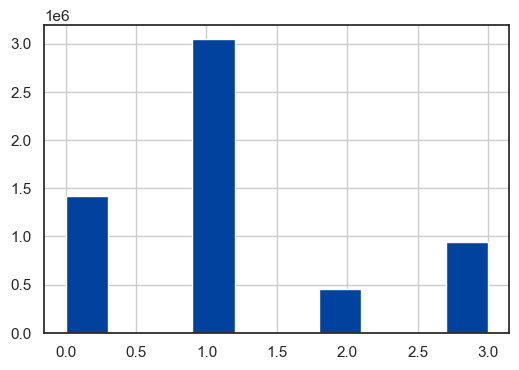

0.680304995674759
1.1740851841421003
0.3129155198871424
0.36738947578761655
0.23740577763393517


In [57]:
# Acess 
df_user_inf = pickle.load(open('results/df_user_inf_update_'+str(mode)+'.pkl', 'rb'), encoding='bytes')
df_user_inf['personAccess'].hist()
plt.show()

print(len(df_user_inf[(df_user_inf['personAccess_hl1']>0)|(df_user_inf['personAccess_hl2']>0)])/len(df_user_inf))
print(len(df_user_inf[(df_user_inf['personAccess_hl2']>0)])/len(df_user_inf[(df_user_inf['personAccess_hl1']>0)]))
print(len(df_user_inf[(df_user_inf['personAccess_hl1']>0)])/len(df_user_inf))
print(len(df_user_inf[(df_user_inf['personAccess_hl2']>0)])/len(df_user_inf))
print(len(df_user_inf[(df_user_inf['personAccess_w']>0)])/len(df_user_inf))

In [16]:
# Income
tractsInfor = np.genfromtxt("data/census/sfbay_tract_infor.csv", delimiter=',', skip_header=1, dtype=None)
tractsIncome = {}
for t in tractsInfor:
    geoID = str(int(t[1])).zfill(11)
    vur = float(t[-3])
    income = float(t[-1])
    tractsIncome[geoID] = income
income2013 = pd.DataFrame.from_dict(tractsIncome, orient='index')

tractsInfor = pd.read_csv('results/census_ac.csv')
tractsIncome = {}
for t in range(len(tractsInfor)):
    geoID = tractsInfor['GEO_ID'].iloc[t][-11:]
    income = tractsInfor['INCOME_M'].iloc[t]
    try:
        tractsIncome[geoID] = int(income)
    except:
        continue
income2019 = pd.DataFrame.from_dict(tractsIncome, orient='index')

income2013 = income2013[income2013>0].dropna()
income2013.merge(income2019,right_on=income2019.index,left_on=income2013.index)
cor_plot = income2013.merge(income2019,right_on=income2019.index,left_on=income2013.index)
cor_plot['0_x'] = cor_plot['0_x']/1000
cor_plot['0_y'] = cor_plot['0_y']/1000
 
regr = linear_model.LinearRegression(fit_intercept=False)
X = cor_plot['0_x'].values.reshape(-1,1)
y = cor_plot['0_y'].values.reshape(-1,1)
regr.fit(X, y)
print(regr.coef_[0])
print(regr.intercept_)

g = sns.jointplot(x="0_x", y="0_y", data=cor_plot,
                  kind="reg", truncate=True,height=6)
g.ax_joint.set_xlabel('2013 Income Median [k $]')
g.ax_joint.set_ylabel('2019 Income Median [k $]')
left, width = .6, .5
bottom, height = .4, .5
right = left + width
top = bottom + height
plt.tight_layout()

pearsonr(cor_plot['0_x'].values, cor_plot['0_y'].values)

[1.68208008]
0.0


(0.8395020150374054, 0.0)

# 2. Sample EV Drivers

## 2.1 Sampling the drivers

In [6]:
# select EV from each zipcode pair
def getEVprobabilities():
    df_user_inf = pickle.load(open('results/df_user_inf_update_'+str(mode)+'.pkl', 'rb'), encoding='bytes')
    df_user_inf = df_user_inf.values.tolist()
    totalUsersInBay = len(df_user_inf)
    print("Total users in SFBay with information: ", totalUsersInBay)
    EVflows = {}
    allUsersEVprob = []
    totalEVs = 0
    for row in df_user_inf:
        userID = int(row[0])
        if row[1]=='':
            continue
        homeZipcode = int(row[1])
        ev_prob = float(row[-1])
        totalEVs += ev_prob
        allUsersEVprob.append([userID,ev_prob])
        if homeZipcode not in EVflows:
            EVflows[homeZipcode] = [[userID, ev_prob]]
        else:
            EVflows[homeZipcode].append([userID, ev_prob])

    totalEVs = int(totalEVs)
    print("Total # EV drivers in 2013: ", totalEVs)
    return allUsersEVprob, totalEVs
    
def selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs, year):
    if desiredEVs < 0:
        scaleFactor = 1
    else:
        scaleFactor = desiredEVs/totalEVs
    # Update: select EV drivers globaly, not in each zipcode
    selecEVs = []
    totalEV_after = 0
    for row in allUsersEVprob:
        userid, ev_prob = row
        ev_prob = ev_prob*scaleFactor
        randnum = random.uniform(0, 1)
        if ev_prob >= randnum:
            selecEVs.append(userid)
    totalEV_after = len(selecEVs)
    print("# of EVs : %.2f" % desiredEVs)
    print("Total # EV drivers selected: ", totalEV_after)
    if desiredEVs < 0:
        saveFileName = 'results/selected_EV_Drivers_raw.pkl'
    else:
        saveFileName = 'results/selected_EV_Drivers_' + str(year) + 'p.pkl'
    pickle.dump(selecEVs, open(saveFileName, 'wb'), pickle.HIGHEST_PROTOCOL)

In [15]:
mode = 1
allUsersEVprob, totalEVs = getEVprobabilities()
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 1500000*1.59, year = 0.3)
allUsersEVprob, totalEVs = getEVprobabilities()
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 5000000*5.2, year = 0.5)

Total users in SFBay with information:  5855165
Total # EV drivers in 2013:  23214
# of EVs : 2385000.00
Total # EV drivers selected:  1503211
Total users in SFBay with information:  5855165
Total # EV drivers in 2013:  23214
# of EVs : 26000000.00
Total # EV drivers selected:  5013047


In [5]:
allUsersEVprob, totalEVs = getEVprobabilities()
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 186355*0.69281241, year = 0)

Total users in SFBay with information:  5855165
Total # EV drivers in 2013:  23214
# of EVs : 129109.06
Total # EV drivers selected:  129003


In [7]:
allUsersEVprob, totalEVs = getEVprobabilities()
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 186355, year = 1)
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 1171033*1.44, year = 2)
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 2342066*2, year = 3)
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 3513099*2.7, year = 4)
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 4684132*4.35, year = 5)
selectEVDrivers(allUsersEVprob, totalEVs, desiredEVs = 5855165*100, year = 6)

Total users in SFBay with information:  5855165
Total # EV drivers in 2013:  23214
# of EVs : 186355.00
Total # EV drivers selected:  186041
# of EVs : 1686287.52
Total # EV drivers selected:  1173166
# of EVs : 4684132.00
Total # EV drivers selected:  2355523
# of EVs : 9485367.30
Total # EV drivers selected:  3518495
# of EVs : 20375974.20
Total # EV drivers selected:  4689276
# of EVs : 585516500.00
Total # EV drivers selected:  5836452


## 2.2 Validation

### 2.2.1 CVRP Overview

In [43]:
cvrp = pd.read_excel('data/census/CVRPStats.xlsx')
cvrp['PURCHASE_DATE'] = pd.to_datetime(cvrp['PURCHASE_DATE'])
end = pd.to_datetime('2019-12-31')

In [44]:
cvrp_cat = cvrp[(cvrp['AIR_DIST']=='Bay Area')&(cvrp['PURCHASE_DATE']<end)][['ID','VEH_CAT']]
cvrp_cat = pd.pivot_table(cvrp_cat, values='ID', columns ='VEH_CAT',aggfunc=np.count_nonzero)
print('BEV ratio',cvrp_cat['BEV'].values/np.sum(cvrp_cat.values))

BEV ratio [0.67972179]


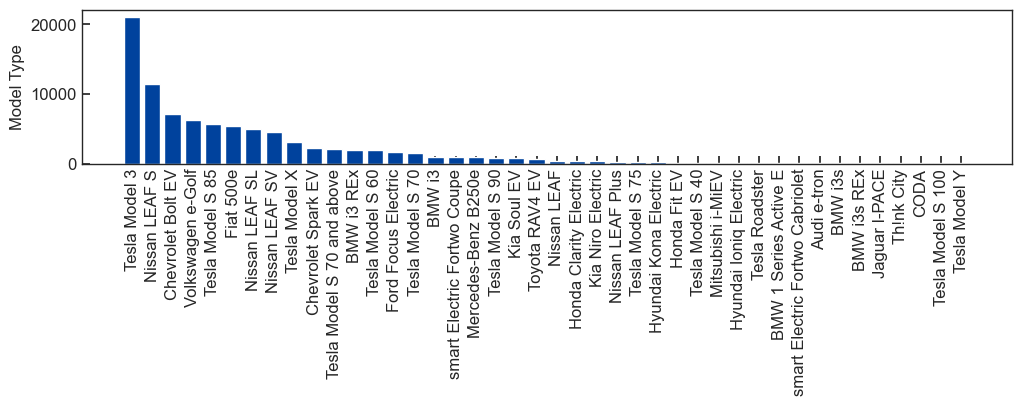

In [45]:
cvpr_bev = cvrp[(cvrp['AIR_DIST']=='Bay Area')&(cvrp['PURCHASE_DATE']<end)&(cvrp['VEH_CAT']=='BEV')]
cvpr_oem = pd.pivot_table(cvpr_bev, values='ID', index = 'VEH_DET', aggfunc=np.count_nonzero)
cvrp_vis = cvpr_oem.sort_values(by='ID',ascending=False)
fig, ax = plt.subplots(figsize=(12,2))
plt.bar(cvrp_vis.index,cvrp_vis.ID)
ax.set_ylabel('# Model')
ax.set_ylabel('Model Type')
plt.xticks(rotation = 90)
plt.savefig('figures/sp_cvrp_model.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')
plt.show()

## 2.2.2 Comparison

In [65]:
year = 1; mode = 1
cvpr_bay = cvrp[(cvrp['AIR_DIST']=='Bay Area')&(cvrp['PURCHASE_DATE']<end)]
cvpr_bay_table = pd.pivot_table(cvpr_bay, values=['ID'], index=['ZIP'], aggfunc=np.count_nonzero)/0.7
cvpr_bay_table['ID'] = cvpr_bay_table['ID'].astype(int)
geozip = gpd.read_file("data/census/sfbay_zip.geojson")
cvpr_bay_table = cvpr_bay_table.reset_index()
cvpr_bay_table['ZIP'] = cvpr_bay_table['ZIP'].astype(str)
geozip_merge = geozip.merge(cvpr_bay_table,right_on='ZIP',left_on='ZCTA5CE10',how='left')
geozip_merge_cvrp = geozip_merge

user_list = pickle.load(open('results/selected_EV_Drivers_' + str(year) + 'p.pkl', 'rb'), encoding='bytes')
df_user_inf = pickle.load(open('results/df_user_inf_update_'+str(mode)+'.pkl', 'rb'), encoding='bytes')
df_user_inf_select = df_user_inf[df_user_inf['userID'].isin(user_list)]
df_user = pd.pivot_table(df_user_inf_select[['userID','homeZipcode']], values='userID', index=['homeZipcode'],aggfunc=np.count_nonzero).reset_index()
geozip = gpd.read_file("data/census/sfbay_zip.geojson")
df_user['homeZipcode'] = df_user['homeZipcode'].astype(str)
geozip_merge = geozip.merge(df_user,right_on='homeZipcode',left_on='ZCTA5CE10',how='left') 
geozip_merge_simulated = geozip_merge

common_list = set(geozip_merge_cvrp['ZIP'])&set(geozip_merge_simulated['homeZipcode'].dropna())
geozip_merge_simulated = geozip_merge_simulated[geozip_merge_simulated['homeZipcode'].isin(common_list)]
geozip_merge_cvrp = geozip_merge_cvrp[geozip_merge_cvrp['ZIP'].isin(common_list)]

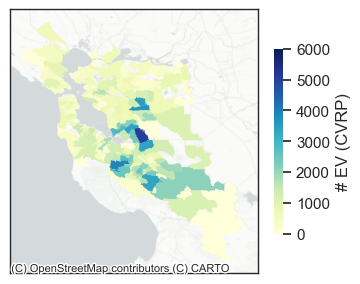

In [61]:
fig, ax = plt.subplots(figsize=(4,4))
ax = geozip_merge_cvrp.plot(ax = ax, column='ID', cmap='YlGnBu',edgecolor="face", linewidth=0.1, vmin=0, vmax = 6000)
cx.add_basemap(ax,source=cx.providers.CartoDB.PositronNoLabels, crs=geozip_merge_cvrp.crs)
ax.set_xticks([]); ax.set_yticks([])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
scatter = ax.collections[0]
cb = plt.colorbar(scatter, ax=ax, shrink=0.6, label = "# EV (CVRP)")
cb.outline.set_visible(False)
ax.grid()
plt.savefig('figures/sp_cvrp_maptruth.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')
plt.show()

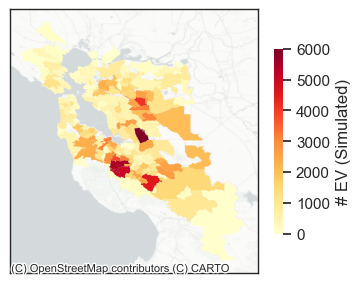

In [63]:
fig, axs = plt.subplots(figsize=(4,4))
ax = geozip_merge_simulated.plot(ax = axs, column='userID', cmap='YlOrRd',edgecolor="face", linewidth=0.1,vmin=0, vmax = 6000)
ax.set_xticks([])
ax.set_yticks([])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
scatter = ax.collections[0]
cb = plt.colorbar(scatter, ax=ax, shrink=0.6, label = "# EV (Simulated)")
cb.outline.set_visible(False)
ax.grid()
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs=geozip_merge_simulated.crs)
plt.savefig('figures/sp_cvrp_mapsim.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')
plt.show()

[1.05611745]
[2.71912447]
0.6974789677023737
(0.8351520626223548, 3.2739478635949383e-57)


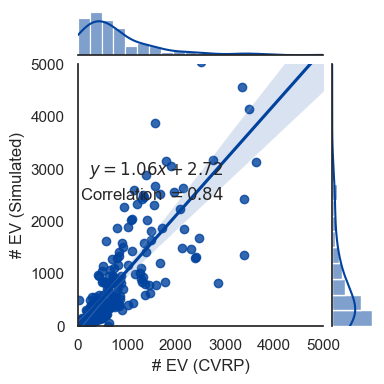

In [72]:
cor_cv_sim = pd.DataFrame()
cor_cv_sim['sim'] = geozip_merge_simulated['userID'].fillna(0)
cor_cv_sim['cvrp'] = geozip_merge_cvrp['ID'].fillna(0)
cor_plot = cor_cv_sim[(cor_cv_sim['sim']!=0)|(cor_cv_sim['cvrp']!=0)]

regr = linear_model.LinearRegression(fit_intercept=True)
X = cor_plot['cvrp'].values.reshape(-1,1)
y = cor_plot['sim'].values.reshape(-1,1)
regr.fit(X, y)
print(regr.coef_[0])
print(regr.intercept_)
print(regr.score(X, y))
print(pearsonr(cor_plot['cvrp'].values, cor_plot['sim'].values))
g = sns.jointplot(x="cvrp", y="sim", data=cor_plot,
                  kind="reg", truncate=True,
                  xlim=(0, 5000), ylim=(0, 5000),height=4)
g.ax_joint.set_xlabel('# EV (CVRP)')
g.ax_joint.set_ylabel('# EV (Simulated)')
left, width = .7, .3
bottom, height = .3, .3
right = left + width
top = bottom + height
plt.text(left, top, '$y=1.06x+2.72$',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)
plt.text(left, top-0.1, 'Correlation $=0.84$',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)
plt.savefig('figures/sp_cvrp_hist.pdf', dpi = 900,format='pdf',  bbox_inches = 'tight')
plt.show()

## 2.3 Visualization  

### 2.3.1 Number of Drivers

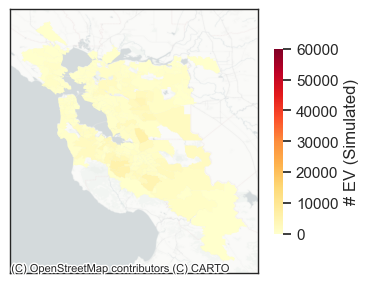

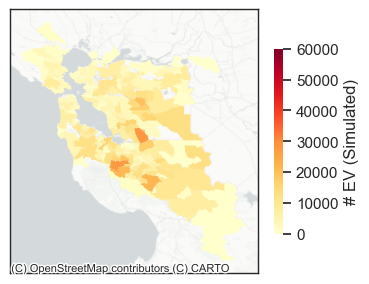

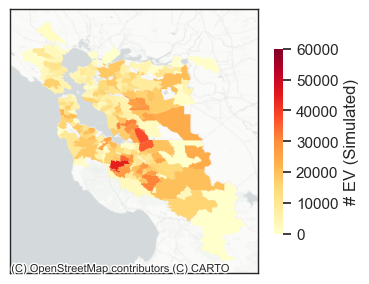

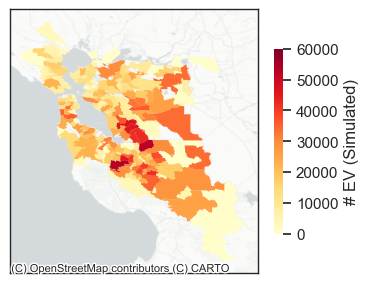

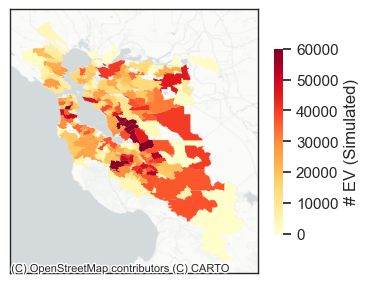

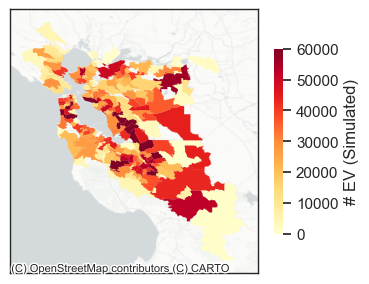

In [64]:
mode = 1
select_user_info = {}
for year in [1,2,3,4,5,6]:
    user_list = pickle.load(open('results/selected_EV_Drivers_' + str(year) + 'p.pkl', 'rb'), encoding='bytes')
    df_user_inf = pickle.load(open('results/df_user_inf_update_' + str(mode) + '.pkl', 'rb'), encoding='bytes')
    df_user_inf_select = df_user_inf[df_user_inf['userID'].isin(user_list)]
    select_user_info[year] = df_user_inf_select

    df_user = pd.pivot_table(df_user_inf_select, values='userID', index=['homeZipcode'],aggfunc=np.count_nonzero).reset_index()
    geozip = gpd.read_file("data/census/sfbay_zip.geojson")
    df_user['homeZipcode'] = df_user['homeZipcode'].astype(str)
    geozip_merge_simulated = geozip.merge(df_user,right_on='homeZipcode',left_on='ZCTA5CE10',how='left') 

    fig, axs = plt.subplots(figsize=(4,4))
    ax = geozip_merge_simulated.plot(ax = axs, column='userID', cmap='YlOrRd',edgecolor="face", linewidth=0.1, vmin=0, vmax=60000)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1)
    scatter = ax.collections[0]
    cb = plt.colorbar(scatter, ax=ax, shrink=0.6, label = "# EV (Simulated)")
    cb.outline.set_visible(False)
    ax.grid()
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs=geozip_merge_simulated.crs)
    plt.savefig('figures/sp_cvrp_mapsim_'+str(year)+'.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')
    plt.show()

### 2.3.2 Income and Travel Distance

In [2]:
mode=1
for (year,rate) in zip(range(2,7),[20,40,60,80,100]):
    if year ==2:
        user_list = pickle.load(open('results/selected_EV_Drivers_' + str(year) + 'p.pkl', 'rb'), encoding='bytes')
        df_user_inf = pickle.load(open('results/df_user_inf_update_' + str(mode) + '.pkl', 'rb'), encoding='bytes')
        df_user_inf_select = df_user_inf[df_user_inf['userID'].isin(user_list)]
        df_user_inf_select['Adoption Rate [%]'] = rate
        df_user_inf_select['Daily Travel Distance [Miles]'] = df_user_inf_select['personDistance']
        df_user_inf_select['Household Income [1,000 $]'] = df_user_inf_select['personIncome']/1000
        df_total = df_user_inf_select
    else:
        user_list = pickle.load(open('results/selected_EV_Drivers_' + str(year) + 'p.pkl', 'rb'), encoding='bytes')
        df_user_inf = pickle.load(open('results/df_user_inf_update_' + str(mode) + '.pkl', 'rb'), encoding='bytes')
        df_user_inf_select = df_user_inf[df_user_inf['userID'].isin(user_list)]
        df_user_inf_select['Adoption Rate [%]'] = rate
        df_user_inf_select['Daily Travel Distance [Miles]'] = df_user_inf_select['personDistance']
        df_user_inf_select['Household Income [1,000 $]'] = df_user_inf_select['personIncome']/1000
        df_total = pd.concat([df_total,df_user_inf_select])

In [3]:
print(df_total[df_total['Adoption Rate [%]']==20]['Household Income [1,000 $]'].median(),df_total[df_total['Adoption Rate [%]']==20]['Household Income [1,000 $]'].std())
print(df_total[df_total['Adoption Rate [%]']==100]['Household Income [1,000 $]'].median(),df_total[df_total['Adoption Rate [%]']==100]['Household Income [1,000 $]'].std())
print(df_total[df_total['Adoption Rate [%]']==20]['Daily Travel Distance [Miles]'].median(),df_total[df_total['Adoption Rate [%]']==20]['Daily Travel Distance [Miles]'].std())
print(df_total[df_total['Adoption Rate [%]']==100]['Daily Travel Distance [Miles]'].median(),df_total[df_total['Adoption Rate [%]']==100]['Daily Travel Distance [Miles]'].std())

197.2992 74.42766819783691
130.04240000000001 63.5263457432874
26.211128162894973 16.150891195914458
26.656567576879496 19.439822435055927


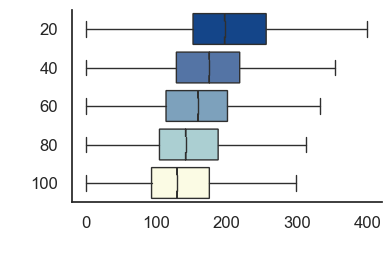

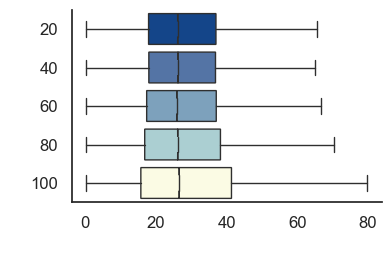

In [54]:
sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(figsize=(4,2.5))
g = sns.boxplot(x='Household Income [1,000 $]',y='Adoption Rate [%]',data=df_total, notch=True,orient='h',showfliers=False,linewidth=1)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
plt.xlabel(space_symbol)
plt.ylabel(space_symbol)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('figures/fig4_box_income.pdf',format='pdf',dpi=900,bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(4,2.5))
g = sns.boxplot(x='Daily Travel Distance [Miles]',y='Adoption Rate [%]',data=df_total, notch=True,orient='h',showfliers=False, linewidth=1)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(space_symbol)
plt.ylabel(space_symbol)
plt.savefig('figures/fig4_box_distance.pdf',format='pdf',dpi=900,bbox_inches='tight')
plt.show()

### 2.3.3 Mobility

In [4]:
id_list = pickle.load(open('results/selected_EV_Drivers_' + str(year) + 'p.pkl', 'rb'), encoding='bytes')
userTraj_time = pickle.load(open('results/userTraj_time_week.pkl', 'rb'), encoding='bytes')
userTraj_label = pickle.load(open('results/userTraj_label_week.pkl', 'rb'), encoding='bytes')
userTraj_zipcode = pickle.load(open('results/userTraj_zipcode_week.pkl', 'rb'), encoding='bytes')
userTraj_energy = pickle.load(open('results/userTraj_energy_all.pkl', 'rb'), encoding='bytes')

user_id = []
arrive_time = []; depature_time = []
stay_type = []; stay_zipcode = []

for id in id_list:
    for i in range(len(userTraj_label[id])):
        user_id.append(id)
        stay_type.append(userTraj_label[id][i])
        stay_zipcode.append(userTraj_zipcode[id][i])
        #travel_time = np.ceil(userTraj_route[id]['time']*6)
        try:
            dtime = userTraj_time[id][i+1]
            depature_time.append(userTraj_time[id][i+1]%144+1)
        except:
            dtime = 144
            depature_time.append(144)
        if i>0:
            #arrive_time.append(min(userTraj_time[id][i]+travel_time[i-1],dtime))
            arrive_time.append(min(userTraj_time[id][i],dtime)%144+1)
        else:
            arrive_time.append(1)

df_trip_energy = pd.DataFrame(data={'id': user_id, 'arrive_time': arrive_time, 'depature_time':depature_time, 'stay_type':stay_type, 'stay_zipcode':stay_zipcode}) 

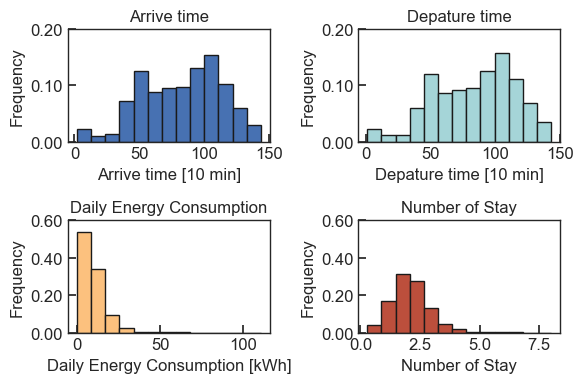

In [14]:
table = pd.pivot_table(df_trip_energy, values='stay_type', index=['id'],aggfunc=np.count_nonzero)
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(6,4))
bin = 13
i = 0; j = 0
x= df_trip_energy[df_trip_energy['arrive_time']!=1]['arrive_time']
axs[i,j].hist(df_trip_energy[df_trip_energy['arrive_time']!=1]['arrive_time'], bin, weights = [1./len(x)]*len(x),  edgecolor='k', facecolor=color_platte[1])
axs[i,j].set_xlabel('Arrive time [10 min]')
axs[i,j].set_ylabel('Frequency')
axs[i,j].set_title('Arrive time')
axs[i,j].set_ylim(0,0.2)
axs[i,j].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

i = 0; j = 1
x= df_trip_energy[df_trip_energy['depature_time']!=144]['depature_time']
axs[i,j].hist(df_trip_energy[df_trip_energy['depature_time']!=144]['depature_time'], bin, weights = [1./len(x)]*len(x), edgecolor='k',facecolor=color_platte[3])
axs[i,j].set_xlabel('Depature time [10 min]')
axs[i,j].set_ylabel('Frequency')
axs[i,j].set_title('Depature time')
axs[i,j].set_ylim(0,0.2)
axs[i,j].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

i = 1; j = 0
x = pd.DataFrame.from_dict(userTraj_energy, orient='index')/7
axs[i,j].hist(x, bin, weights = [1./len(x)]*len(x), edgecolor='k',facecolor=color_platte[5])
axs[i,j].set_xlabel('Daily Energy Consumption [kWh]')
axs[i,j].set_ylabel('Frequency')
axs[i,j].set_title('Daily Energy Consumption')
axs[i,j].set_ylim(0,0.6)
axs[i,j].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

i = 1; j = 1
x = table['stay_type'].values/7
axs[i,j].hist(x, bin, weights = [1./len(x)]*len(x), edgecolor='k', facecolor=color_platte[7])
axs[i,j].set_xlabel('Number of Stay')
axs[i,j].set_ylabel('Frequency')
axs[i,j].set_title('Number of Stay')
axs[i,j].set_ylim(0,0.6)
axs[i,j].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.savefig('figures/sp_overview.pdf', dpi = 900, pad_inches = .1, bbox_inches = 'tight')
plt.show()